In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random
import pickle 
import matplotlib.pyplot as plt
import csv



In [3]:
df = pd.read_csv('../cleaned_data/reviews_matched.csv')

#print out some info about the data
print(df.shape)
df = df.drop_duplicates()
print(df.shape)
# Print the entire DataFrame
print(df)

duplicate_count = df['Title'].duplicated().sum()
# print("Number of books with at least two people rating it:", duplicate_count)
duplicate_counts_per_value = df['Title'].value_counts()
print(duplicate_counts_per_value)
titles = list(df['Title'].unique())
num_titles = len(titles)
print("Number of unique books: ", num_titles)
user_ids = list(df['User_id'].unique())
num_users = len(user_ids)
print("number of users is: ", num_users)
# print("user_ids = ", user_ids)


(61561, 15)
(61561, 15)
       Unnamed: 0                   Title            Author          Rating  \
0             181               bloodline     james rollins  Invalid rating   
1             199               nocturnal      scott sigler  Invalid rating   
2             202               nocturnal      scott sigler  Invalid rating   
3             203                pandemic      scott sigler  Invalid rating   
4             343       a river enchanted      rebecca ross               4   
...           ...                     ...               ...             ...   
61556      348453  a discovery of witches  deborah harkness               5   
61557      348464              yes please       amy poehler               5   
61558      348465             i am malala  malala yousafzai               5   
61559      348466              bossypants          tina fey               5   
61560      348476    steal like an artist      austin kleon               4   

         User_id        isb

In [4]:
#Number of reviews per title
print("Num reviews, title")
for index, value in duplicate_counts_per_value.iteritems():
        print(value, index)



Num reviews, title
739 the fault in our stars
639 it ends with us
561 verity
553 catching fire
542 divergent
539 the seven husbands of evelyn hugo
522 a court of thorns and roses
471 where the crawdads sing
425 fourth wing
420 the girl on the train
418 the silent patient
393 a court of mist and fury
387 gone girl
355 the help
353 fifty shades of grey
349 a court of wings and ruin
336 the housemaid
317 it starts with us
314 the midnight library
311 ugly love
302 heartstopper
297 throne of glass
294 a court of frost and starlight
274 daisy jones & the six
250 normal people
248 reminders of him
244 educated
242 the selection
241 the guest list
236 a ​court of silver flames
229 lessons in chemistry
224 crown of midnight
223 a good girl's guide to murder
219 the nightingale
212 little fires everywhere
211 me before you
206 insurgent
204 heir of fire
202 book lovers
201 people we meet on vacation
200 all the light we cannot see
197 happy place
194 beach read
187 the love hypothesis
187 the i

/tmp/ipykernel_991/134545694.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in duplicate_counts_per_value.iteritems():


morning star
43 listen for the lie
43 the outsider
43 without merit
43 a curse for true love
42 the institute
42 shoe dog
42 the covenant of water
42 losing hope
42 the paradise problem
42 all good people here
42 the bullet that missed
41 the ex hex
41 talking to strangers
41 night road
41 the wife upstairs
41 assistant to the villain
41 the war of two queens
40 the 7 1/2 deaths of evelyn hardcastle
40 the nickel boys
40 oathbringer
40 all systems red
40 the fifth season
40 beneath a scarlet sky
40 final offer
40 i'll be gone in the dark
40 the sun is also a star
39 girl, woman, other
39 tender is the flesh
39 leather & lark
39 legends & lattes
39 annihilation
39 the five-star weekend
39 pineapple street
39 home is where the bodies are
39 city of girls
39 i'll give you the sun
39 the casual vacancy
39 five feet apart
38 lean in
38 the last devil to die
38 mr. mercedes
38 recursion
38 my sister, the serial killer
38 all the colors of the dark
38 the raven boys
38 one last stop
37 all th

14 the first to die at the end
14 open book
14 the creative act
14 this is how you lose her
14 moonwalking with einstein
14 chain of gold
14 the girl before
14 tell me everything
14 autoboyography
14 the river we remember
14 come as you are
14 how the light gets in
14 the young elites
14 citizen
14 ghost story
14 the plot
14 gabriel's inferno
14 a fate inked in blood
14 joyland
13 american royals
13 starling house
13 the last black unicorn
13 landline
13 maid
13 the third wheel
13 criminal
13 leonardo da vinci
13 sleeping beauties
13 felix ever after
13 full measures
13 avatar
13 go tell the bees that i am gone
13 beautiful bastard
13 wither
13 the school for good and evil
13 the last town
13 soulless
13 chain-gang all-stars
13 in the lives of puppets
13 these violent delights
13 the raven king
13 supernova
13 broken harbor
13 the most fun we ever had
13 fugitive telemetry
13 the september house
13 the diviners
13 the marriage bargain
13 the troop
13 the broken eye
13 the blinding knif

8 why nations fail
8 the gods of guilt
8 house of glass
8 the return of ellie black
8 the obsession
8 one to watch
8 necessary lies
8 smarter faster better
8 if i was your girl
8 seriously... i'm kidding
8 saga, volume 2
8 the nature of the beast
8 silent child
8 the white princess
8 maddaddam
8 beneath this man
8 the fall of five
8 lover at last
8 the hard thing about hard things
8 dating dr. dil
8 the kingmaker's daughter
8 chain of thorns
7 a world without heroes
7 mastiff
7 obsidio
7 the first fifteen lives of harry august
7 a woman of no importance
7 again, but better
7 sky in the deep
7 one summer in savannah
7 the moment of lift
7 the ferryman
7 banyan moon
7 perfect on paper
7 taste
7 glass houses
7 betty
7 going infinite
7 a higher loyalty
7 a constellation of vital phenomena
7 the calculating stars
7 strange the dreamer
7 a crown this cold and heavy
7 not that bad
7 city of ghosts
7 tell me more
7 rebel of the sands
7 mad about the boy
7 still life with bread crumbs
7 lock in

5 once and for all
5 eve
5 maine
5 uncommon criminals
5 kings rising
5 emily wilde’s map of the otherlands
5 the wind knows my name
5 such sharp teeth
5 the jasad heir
5 broken monsters
5 the wolf and the woodsman
5 the secret commonwealth
5 meddling kids
5 ayesha at last
5 lost lake
5 the winner's crime
5 the king's curse
5 the mime order
5 stone mattress
5 no matter the wreckage
5 depression & other magic tricks
5 children of ruin
5 the black bird oracle
5 lab girl
5 the city of mirrors
5 river sing me home
5 these infinite threads
5 the orchardist
5 the great divide
5 aurora rising
5 five broken blades
5 the law of moses
5 the marriage act
5 age of swords
5 chasing fire
5 the iron knight
5 the demon of unrest
5 starfish
5 ancillary mercy
5 go the fuck to sleep
5 the thing about jellyfish
5 heart berries
5 the black witch
5 ancillary sword
5 buried prey
5 some desperate glory
5 a tale of witchcraft...
5 the reckless oath we made
5 the autumn republic
5 moonglow
5 speaking from among 

3 hope
3 i hunt killers
3 the penderwicks in spring
3 fyre
3 darth vader and son
3 saga, volume 8
3 paper girls, volume 5
3 how to be perfect
3 paper girls, volume 4
3 the times i knew i was gay
3 dracul
3 amari and the night brothers
3 when among crows
3 silence fallen
3 redefining realness
3 there are rivers in the sky
3 magic triumphs
3 the fourteenth goldfish
3 emperor of thorns
3 the royal ranger
3 leaders eat last
3 the night bird
3 imogen, obviously
3 murder road
3 ophelia after all
3 girl at war
3 vader's little princess
3 borne
3 monstrilio
3 the case for jamie
3 leverage in death
3 is this anything?
3 whiskey in a teacup
3 small fry
3 other words for home
3 strange weather
3 cooked
3 now you see her
3 a spindle splintered
3 the unbeatable squirrel girl, vol. 1
3 tribe
3 a gathering of shadows
3 the peach keeper
3 m train
3 the silent girl
3 chain reaction
3 the opposite of loneliness
3 upheaval
3 everything leads to you
3 california
3 saga, volume 7
3 the fates divide
3 stran

2 coronavirus
2 counting down with you
2 before and after
2 did you ever have a family
2 fearless
2 hallelujah anyway
2 we are the weather
2 a night without stars
2 we have no idea
2 playground
2 the consuming fire
2 the future of another timeline
2 the last tudor
2 red side story
2 disappearance at devil's rock
2 growing things and other stories
2 run
2 a night like this
2 eternal rider
2 firebreak
2 the end of everything
2 pioneer girl
2 the long cosmos
2 the long mars
2 the bright hour
2 ms. marvel, vol. 8
2 war of the wolf
2 in the plex
2 kick-ass 2
2 apex
2 great north road
2 year of the monkey
2 red hill
2 something to talk about
2 based on a true story
2 rise of the isle of the lost
2 everything's trash, but it's okay
2 the kitchen counter cooking school
2 fascism
2 the pearl that broke its shell
2 the queen's accomplice
2 american midnight
2 one cool friend
2 storm cursed
2 gentleman jole and the red queen
2 heaven's queen
2 out of the black
2 we come apart
2 murder of crows
2 

1 tibetan peach pie
1 high voltage
1 breathless
1 thirteen
1 styxx
1 sacrificial magic
1 vesper flights
1 sightwitch
1 nine liars
1 bravey
1 sisters of the lost nation
1 revenant gun
1 the shape of thunder
1 from the desk of zoe washington
1 wicked and the wallflower
1 all-american murder
1 waging heavy peace
1 provenance
1 huda f are you?
1 chlorine sky
1 alif the unseen
1 trail of the lost
1 the fate of the tearling
1 chef's kiss
1 if they come for us
1 salt
1 cook like a pro
1 she memes well
1 the blood of emmett till
1 a bánh mì for two
1 the dressmaker of khair khana
1 hunt the stars
1 a promise of peridot
1 becoming duchess goldblatt
1 detroit
1 suspect
1 the autobiography of mrs. tom thumb
1 shit, actually
1 the tangled tree
1 pandemic
1 believe me
1 do you mind if i cancel?
1 navigating early
1 raven stratagem
1 conditional citizens
1 the last tale of the flower bride
1 wandering in strange lands
1 american vampire, vol. 3
1 here comes trouble
1 his truth is marching on
1 the m

In [5]:
# Convert 'rating' to numeric, forcing invalid values to NaN
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Remove rows where 'rating' is NaN
df = df.dropna(subset=["Rating"]).reset_index(drop=True)

# Group by title to find count and average rating
result = df.groupby("Title").agg(
    count=("Title", "size"),
    avg_rating=("Rating", "mean")
).reset_index()


In [8]:
# Make an array with columns as users and rows as books
ratings = np.zeros((num_users, num_titles))

for index, row in df.iterrows():
    if row['Title'] in titles:
        try:
            ratings[user_ids.index(row['User_id']), titles.index(row["Title"])] = int(row["Rating"])
        except:
            pass
        
print("ratings size = ", ratings.shape)
#remove users where all lines are 0s. 
ratings = ratings[~np.all(ratings == 0, axis=1)]
print("ratings size = ", ratings.shape)

with open("../cleaned_data/ratings_user_v_book.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(ratings)


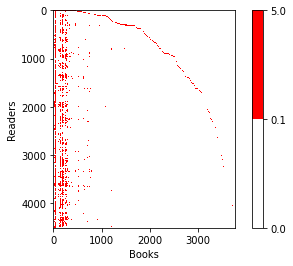

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a custom colormap with white, yellow, and red
cmap = mcolors.ListedColormap(['white', 'red'])
bounds = [0, 0.1, 5]  # Define ranges: 0 (white), 0.1-0.5 (yellow), 0.5-1 (red)
norm = mcolors.BoundaryNorm(bounds, len(cmap.colors))

plt.imshow(ratings, cmap=cmap, norm=norm)
plt.colorbar()
plt.xlabel("Books")
plt.ylabel("Readers")
plt.show()


Text(0, 0.5, 'Number of books')

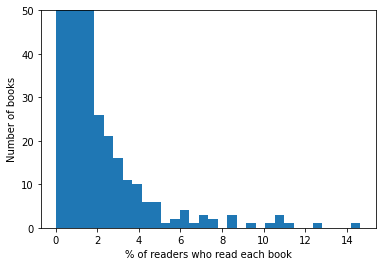

In [21]:
plt.hist(duplicate_counts_per_value/num_users*100, bins = 32)
plt.ylim([0,50])
plt.xlabel('% of readers who read each book')
plt.ylabel("Number of books")
# print(duplicate_counts_per_value)

Text(0, 0.5, 'Number of users')

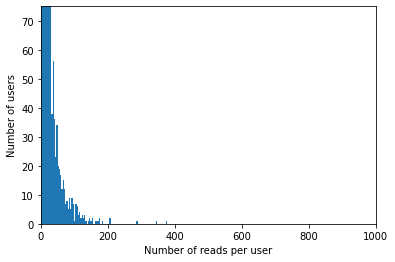

In [22]:
duplicate_counts_per_user = df['User_id'].value_counts()
plt.hist(duplicate_counts_per_user, bins = 100)
plt.ylim([0,75])
plt.xlim([0,1000])
plt.xlabel('Number of reads per user')
plt.ylabel("Number of users")
# print(duplicate_counts_per_value)